In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from data_prep import data_prep
import get_model
import utils

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
dfreal = pd.read_csv('dataset\Biomass_Private.csv')

data_loader = data_prep()
data_loader.create_images(width=80, height=64)
selected_pix = data_loader.selected_pix
images = data_loader.get_images()
dfbio = data_loader.dfbio

In [3]:
# fig, axes = plt.subplots(2,4, figsize=(20,8))
# for i,image in enumerate(images):
#     axes.flatten()[i].imshow(image, cmap='gray')

In [4]:
model = get_model.Unet(dfbio, images)
X_train, y_train, X_val, y_val = model.prepare_data(fit=False)
history = model.eval(X_train, y_train, X_val, y_val)
# preds_image, preds_list = model.predict(selected_pix)

Epoch 1/250
2/2 [==============================] - 4s 551ms/step - loss: 64.1097 - val_loss: 58.8167 - lr: 0.0100
Epoch 2/250
2/2 [==============================] - 0s 200ms/step - loss: 63.0826 - val_loss: 75.1674 - lr: 0.0100
Epoch 3/250
2/2 [==============================] - 0s 211ms/step - loss: 62.7092 - val_loss: 316.9386 - lr: 0.0100
Epoch 4/250
2/2 [==============================] - 0s 188ms/step - loss: 62.4337 - val_loss: 9972.5273 - lr: 0.0100
Epoch 5/250
2/2 [==============================] - 0s 231ms/step - loss: 62.1457 - val_loss: 28021.6094 - lr: 0.0100
Epoch 6/250
2/2 [==============================] - 0s 176ms/step - loss: 61.8373 - val_loss: 23022.8281 - lr: 0.0100
Epoch 7/250
2/2 [==============================] - 0s 179ms/step - loss: 61.5051 - val_loss: 17335.1797 - lr: 0.0100
Epoch 8/250
2/2 [==============================] - 0s 200ms/step - loss: 61.1800 - val_loss: 15274.0664 - lr: 0.0100
Epoch 9/250
2/2 [==============================] - 0s 241ms/step - loss: 

0.001 100 200 3 : 29.3702  
0.01 - 6 : 26.7662  
0.01 50 100 150 6 : 29.487  
0.01 100 200 1 : 28.612  
0.01 100 200 300 3 : 26.425  
0.01 50 100 150 3 : 30.190
0.01 50 100 200 3 : 31.959 (bagus)  
0.01 50 100 150 200 3 : 28.905 (bagus)

In [12]:
model = get_model.Unet(dfbio, images)
X_train, y_train = model.prepare_data(fit=True)
history = model.fit(X_train, y_train)

Epoch 1/250
2/2 [==============================] - 3s 131ms/step - loss: 65.8326 - lr: 0.0100
Epoch 2/250
2/2 [==============================] - 0s 128ms/step - loss: 64.7381 - lr: 0.0100
Epoch 3/250
2/2 [==============================] - 0s 127ms/step - loss: 64.3699 - lr: 0.0100
Epoch 4/250
2/2 [==============================] - 0s 153ms/step - loss: 64.0853 - lr: 0.0100
Epoch 5/250
2/2 [==============================] - 0s 143ms/step - loss: 63.8371 - lr: 0.0100
Epoch 6/250
2/2 [==============================] - 0s 131ms/step - loss: 63.5059 - lr: 0.0100
Epoch 7/250
2/2 [==============================] - 0s 121ms/step - loss: 63.2033 - lr: 0.0100
Epoch 8/250
2/2 [==============================] - 0s 169ms/step - loss: 62.8803 - lr: 0.0100
Epoch 9/250
2/2 [==============================] - 0s 146ms/step - loss: 62.5419 - lr: 0.0100
Epoch 10/250
2/2 [==============================] - 0s 184ms/step - loss: 62.1930 - lr: 0.0100
Epoch 11/250
2/2 [==============================] - 0s 187m

In [18]:
utils.save_model(model.model, 'Unet_250_29.472')

Save Successful!


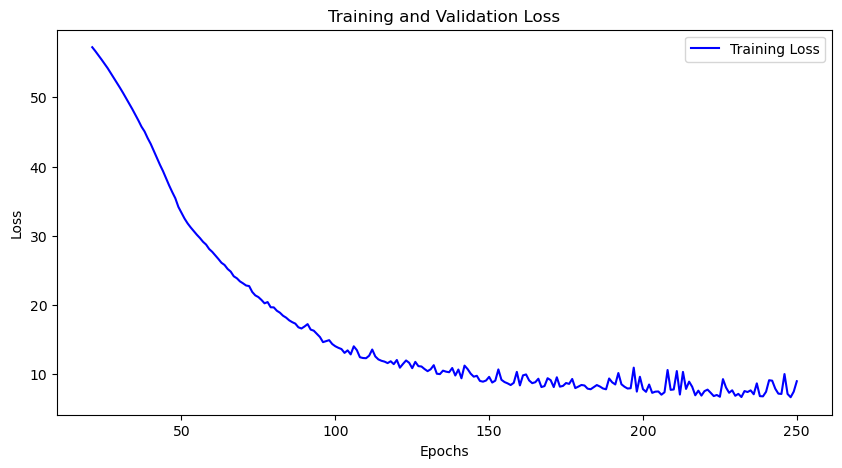

In [13]:
utils.plot_loss(history, offset=20, val=False)

In [14]:
preds_image, preds_list = model.predict(selected_pix)

1/1 [==============================] - 0s 30ms/step


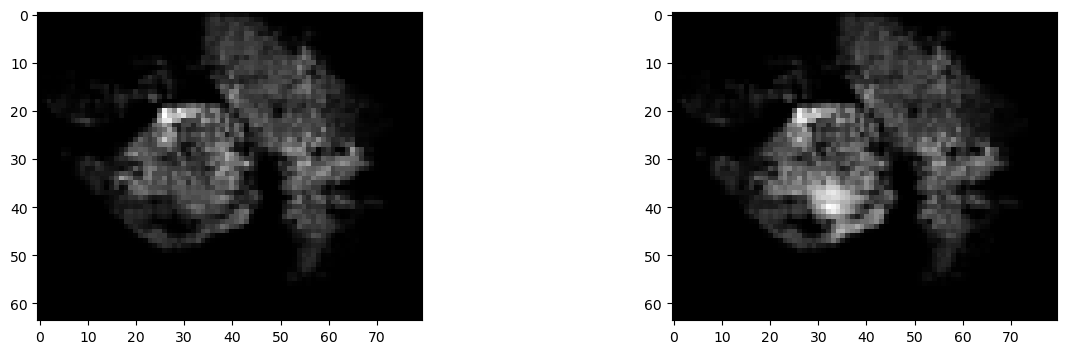

In [15]:
i=2
fig, axes = plt.subplots(1,2,figsize=(15,4))
axes[0].imshow(preds_image[0][0,:,:,0], cmap='gray')
axes[1].imshow(preds_image[1][0,:,:,0], cmap='gray')

In [16]:
np.sum(preds_list['2018']), np.sum(preds_list['2019'])

(307660.78, 365869.44)

In [17]:
utils.real_eval(dfreal, preds_list)

(29.456247905051836, 40.10083802857216)